# ML with sklearn

### Read the Auto data

In [30]:
from google.colab import files
uploaded = files.upload()

Saving Auto.csv to Auto (1).csv


In [61]:
import pandas as pd
import seaborn as sb

In [32]:
df = pd.read_csv('Auto.csv')
print(df.head(), '\n')
print('\nDimensions:', df.shape)

    mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0  18.0          8         307.0         130    3504          12.0  70.0   
1  15.0          8         350.0         165    3693          11.5  70.0   
2  18.0          8         318.0         150    3436          11.0  70.0   
3  16.0          8         304.0         150    3433          12.0  70.0   
4  17.0          8         302.0         140    3449           NaN  70.0   

   origin                       name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino   


Dimensions: (392, 9)


### Data exploration with code

Mpg: range = 37.6, average = 23.445918\
Weight: range = 3527, average = 2977.584184\
Year: range = 12, average = 76.010256

In [33]:
df[['mpg', 'weight', 'year']].describe()

,mpg,weight,year
count,392.000000,392.000000,390.000000
mean,23.445918,2977.584184,76.010256
std,7.805007,849.402560,3.668093
min,9.000000,1613.000000,70.000000
25%,17.000000,2225.250000,73.000000
50%,22.750000,2803.500000,76.000000
75%,29.000000,3614.750000,79.000000
max,46.600000,5140.000000,82.000000


### Explore data types

In [34]:
print(df.dtypes, '\n')
df.cylinders = df.cylinders.astype('category').cat.codes
df.origin = df.origin.astype('category')
print(df.dtypes, 'n')

mpg             float64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year            float64
origin            int64
name             object
dtype: object 

mpg              float64
cylinders           int8
displacement     float64
horsepower         int64
weight             int64
acceleration     float64
year             float64
origin          category
name              object
dtype: object n


### Deal with NAs

In [35]:
df = df.dropna()
df.shape

(389, 9)

### Modify columns

In [36]:
mpg_mean = df['mpg'].mean()
df['mpg_high'] = df['mpg'].apply(lambda x: x > mpg_mean)
df = df.drop(columns=['mpg', 'name'])
df.head()

,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg_high
0,4,307.0,130,3504,12.0,70.0,1,False
1,4,350.0,165,3693,11.5,70.0,1,False
2,4,318.0,150,3436,11.0,70.0,1,False
3,4,304.0,150,3433,12.0,70.0,1,False
6,4,454.0,220,4354,9.0,70.0,1,False


### Data exploration with graphs

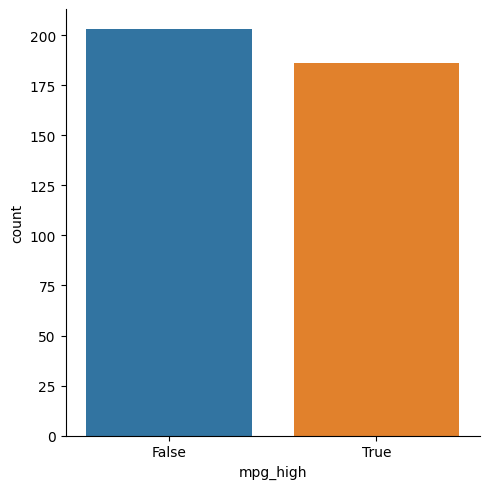

In [48]:
sb.catplot(x='mpg_high', kind='count', data=df)

The mpg data is about evenly split between its mean.

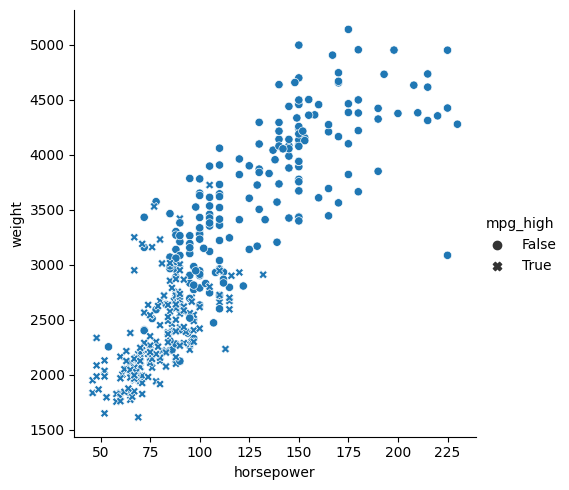

In [49]:
sb.relplot(x='horsepower', y='weight', data=df, style=df.mpg_high)

Weight and horsepower seem to have a linear relationship and the two mpg_high values seem to be clustered together.

<Axes: xlabel='mpg_high', ylabel='weight'>

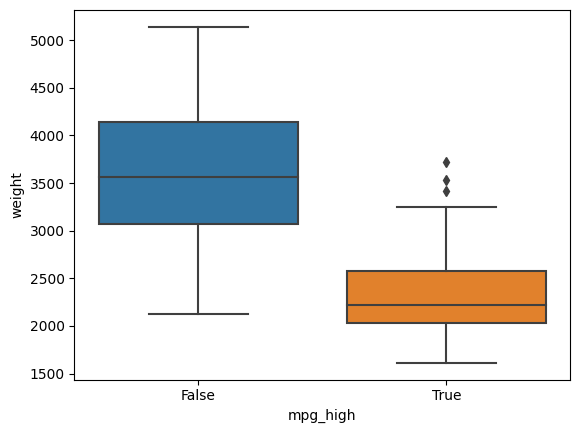

In [50]:
sb.boxplot(x=df['mpg_high'], y=df['weight'])

Cars with high mpg seem to be lighter.

### Train/test split

In [62]:
from sklearn.model_selection import train_test_split

X, y = df.loc[:, df.columns != 'mpg_high'], df.mpg_high
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print('Train size:', X_train.shape)
print('Test size:', X_test.shape)

Train size: (311, 7)
Test size: (78, 7)


### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

pred = clf.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, pred))
print('Precision score: ', precision_score(y_test, pred))
print('Recall score: ', recall_score(y_test, pred))
print('f1 score: ', f1_score(y_test, pred))

Accuracy score:  0.8589743589743589
Precision score:  0.7297297297297297
Recall score:  0.9642857142857143
f1 score:  0.8307692307692307


In [60]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, pred)

array([[40, 10],
       [ 1, 27]])

### Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier

clf2 = DecisionTreeClassifier()
clf2.fit(X_train, y_train)

DecisionTreeClassifier()

In [65]:
pred2 = clf2.predict(X_test)
print('Accuracy score: ', accuracy_score(y_test, pred2))
print('Precision score: ', precision_score(y_test, pred2))
print('Recall score: ', recall_score(y_test, pred2))
print('f1 score: ', f1_score(y_test, pred2))

Accuracy score:  0.9102564102564102
Precision score:  0.8620689655172413
Recall score:  0.8928571428571429
f1 score:  0.8771929824561403


In [66]:
confusion_matrix(y_test, pred2)

array([[46,  4],
       [ 3, 25]])

[Text(0.6433823529411765, 0.9444444444444444, 'x[0] <= 2.5\ngini = 0.5\nsamples = 311\nvalue = [153, 158]'),
 Text(0.4338235294117647, 0.8333333333333334, 'x[2] <= 101.0\ngini = 0.239\nsamples = 173\nvalue = [24, 149]'),
 Text(0.27941176470588236, 0.7222222222222222, 'x[5] <= 75.5\ngini = 0.179\nsamples = 161\nvalue = [16, 145]'),
 Text(0.14705882352941177, 0.6111111111111112, 'x[1] <= 119.5\ngini = 0.362\nsamples = 59\nvalue = [14, 45]'),
 Text(0.058823529411764705, 0.5, 'x[0] <= 0.5\ngini = 0.159\nsamples = 46\nvalue = [4, 42]'),
 Text(0.029411764705882353, 0.3888888888888889, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.08823529411764706, 0.3888888888888889, 'x[3] <= 2683.0\ngini = 0.087\nsamples = 44\nvalue = [2, 42]'),
 Text(0.058823529411764705, 0.2777777777777778, 'x[3] <= 2377.0\ngini = 0.045\nsamples = 43\nvalue = [1, 42]'),
 Text(0.029411764705882353, 0.16666666666666666, 'gini = 0.0\nsamples = 38\nvalue = [0, 38]'),
 Text(0.08823529411764706, 0.16666666666666666, 'x[3

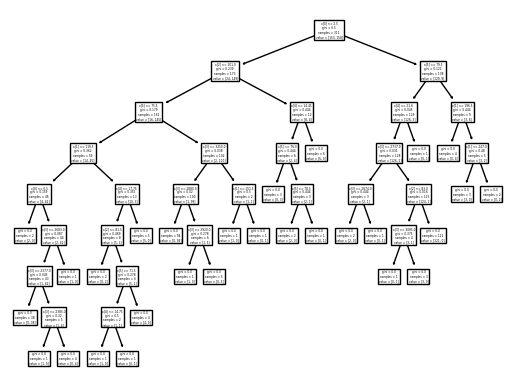

In [68]:
from sklearn import tree

tree.plot_tree(clf2)

### Neural Network

In [69]:
from sklearn import preprocessing
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

scaler = preprocessing.StandardScaler().fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [93]:
clf3 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(7, 7), max_iter=1000, random_state=1234)
clf3.fit(X_train_scaled, y_train)
pred3 = clf3.predict(X_test_scaled)

print('Accuracy = ', accuracy_score(y_test, pred3), '\n')
print(confusion_matrix(y_test, pred3), '\n')
print(classification_report(y_test, pred3))

Accuracy =  0.9102564102564102 

[[45  5]
 [ 2 26]] 

              precision    recall  f1-score   support

       False       0.96      0.90      0.93        50
        True       0.84      0.93      0.88        28

    accuracy                           0.91        78
   macro avg       0.90      0.91      0.90        78
weighted avg       0.91      0.91      0.91        78



In [131]:
clf4 = MLPClassifier(solver='lbfgs', hidden_layer_sizes=(2, 1), max_iter=1000, random_state=1234)
clf4.fit(X_train_scaled, y_train)
pred4 = clf4.predict(X_test_scaled)

print('Accuracy = ', accuracy_score(y_test, pred4), '\n')
print(confusion_matrix(y_test, pred4), '\n')
print(classification_report(y_test, pred4))

Accuracy =  0.9230769230769231 

[[45  5]
 [ 1 27]] 

              precision    recall  f1-score   support

       False       0.98      0.90      0.94        50
        True       0.84      0.96      0.90        28

    accuracy                           0.92        78
   macro avg       0.91      0.93      0.92        78
weighted avg       0.93      0.92      0.92        78



I think the second model did better because it was simpler than the first - it suits the guideline of having less nodes for smaller datasets.

### Analysis

The neural network with two hidden layers and three total nodes did the best based on accuracy.

**Logistic regression**\
Accuracy: 0.859\
Recall: 0.964\
Precision: 0.730

**Decision tree**\
Accuracy: 0.910\
Recall: 0.893\
Precision: 0.862

**Neural network 1 (7, 7)**\
Accuracy: 0.910\
Recall: 0.923\
Precision: 0.84

**Neural network 2 (2, 1)**\
Accuracy: 0.923\
Recall: 0.96\
Precision: 0.84\

Neural network 2 probably did the best because it captured some nuanced relationship between the predictors that logistic regression and decision trees couldn't catch. Neural network 1 performed very similar to decision trees but was probably overkill with the amount of nodes used to replicate decision trees' simple algorithm.

<br>

#### R vs sklearn
I prefer using sklearn to R as I was more familiar with Python and was glad to finally start using it instead of R. R has some good features like built-in plots and operations on data, as well as highly optimized algorithms. With Python, I'm more familiar with its syntax and can understand it easily, and I have access to other non-ML libraries.